In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [4]:
bike=pd.read_csv("train_bikes.csv")

In [5]:
bike

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [6]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [7]:
bike.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [26]:
from datetime import date
bike1=bike.copy()
bike1['date'] = pd.to_datetime(bike['datetime']).dt.date
bike1['time'] = pd.to_datetime(bike['datetime']).dt.time
print(bike1)

                  datetime  season  holiday  workingday  weather   temp  \
0      2011-01-01 00:00:00       1        0           0        1   9.84   
1      2011-01-01 01:00:00       1        0           0        1   9.02   
2      2011-01-01 02:00:00       1        0           0        1   9.02   
3      2011-01-01 03:00:00       1        0           0        1   9.84   
4      2011-01-01 04:00:00       1        0           0        1   9.84   
...                    ...     ...      ...         ...      ...    ...   
10881  2012-12-19 19:00:00       4        0           1        1  15.58   
10882  2012-12-19 20:00:00       4        0           1        1  14.76   
10883  2012-12-19 21:00:00       4        0           1        1  13.94   
10884  2012-12-19 22:00:00       4        0           1        1  13.94   
10885  2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count        date  \
0      14.395        8

In [27]:
df=bike1.drop('datetime',axis=1)

In [28]:
df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,time
0,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011-01-01,00:00:00
1,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011-01-01,01:00:00
2,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011-01-01,02:00:00
3,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011-01-01,03:00:00
4,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011-01-01,04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012-12-19,19:00:00
10882,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012-12-19,20:00:00
10883,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012-12-19,21:00:00
10884,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012-12-19,22:00:00


In [29]:
#identifying the discrete and continous numerical variables
discrete_variables=[features for features in df.columns if len(df[features].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_variables)))


Discrete Variables Count: 5


In [30]:
discrete_variables

['season', 'holiday', 'workingday', 'weather', 'time']

In [31]:
df[discrete_variables].head()

,season,holiday,workingday,weather,time
0,1,0,0,1,00:00:00
1,1,0,0,1,01:00:00
2,1,0,0,1,02:00:00
3,1,0,0,1,03:00:00
4,1,0,0,1,04:00:00


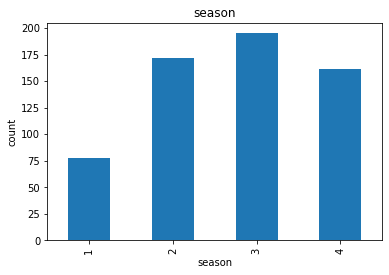

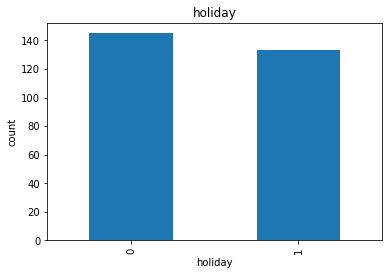

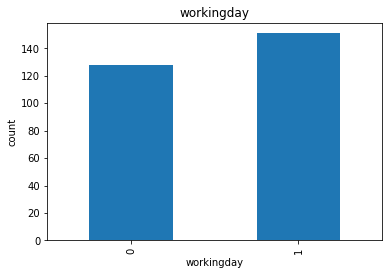

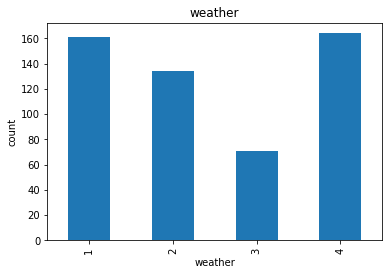

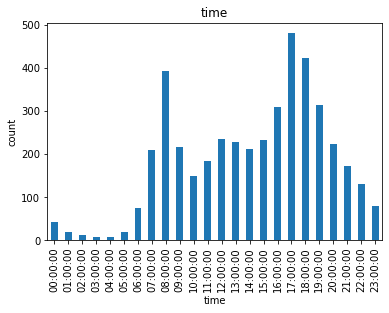

In [32]:
#relation between count and the discrete variables 
for feature in discrete_variables:
    data=df.copy()
    data.groupby(feature)['count'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.title(feature)
    plt.show()

In [33]:
#continous variable
continous_variable=[feature for feature  in df if feature not in discrete_variables]
continous_variable

['temp',
 'atemp',
 'humidity',
 'windspeed',
 'casual',
 'registered',
 'count',
 'date']

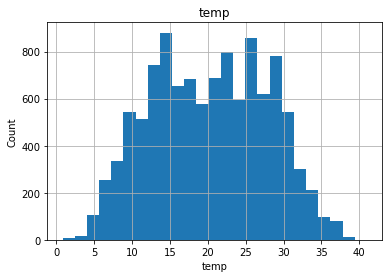

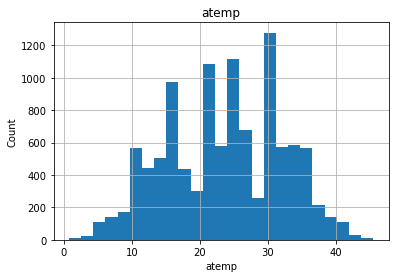

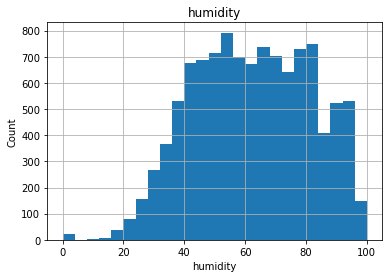

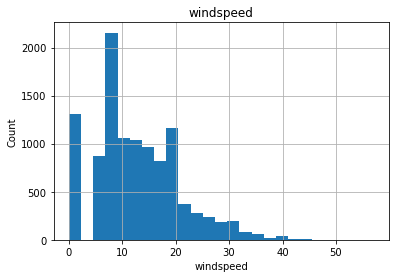

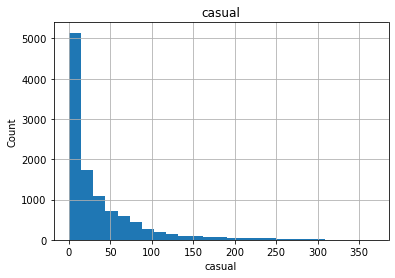

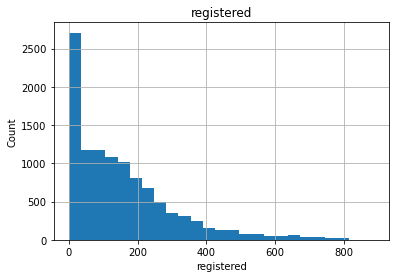

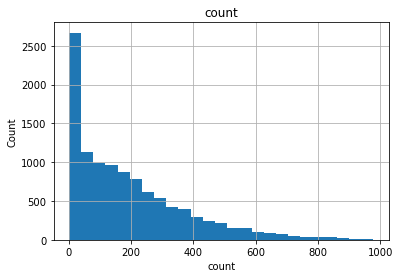

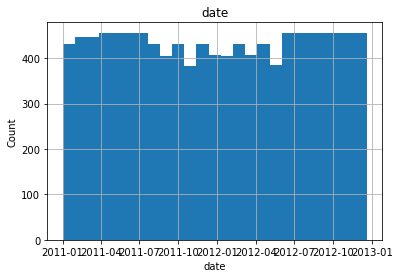

In [16]:
for feature in continous_variable:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

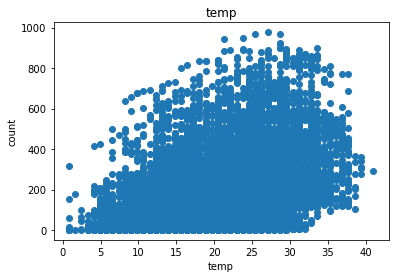

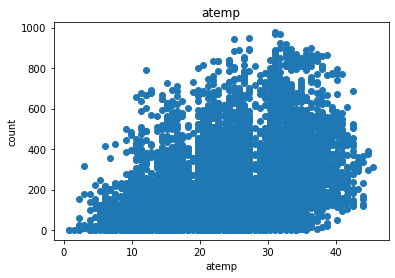

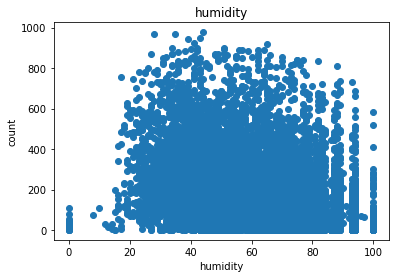

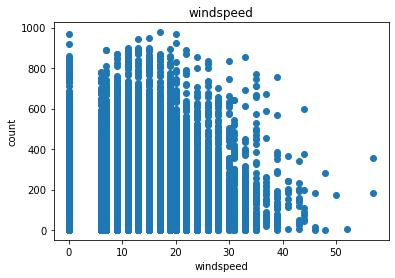

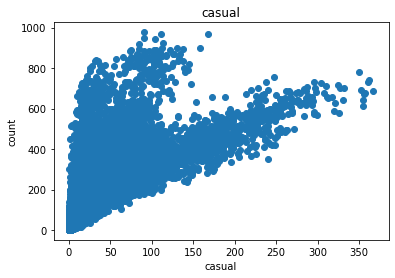

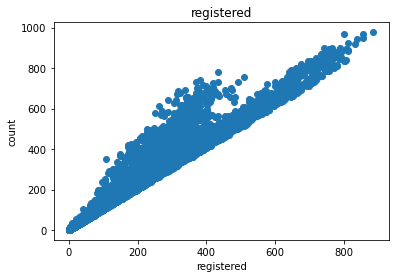

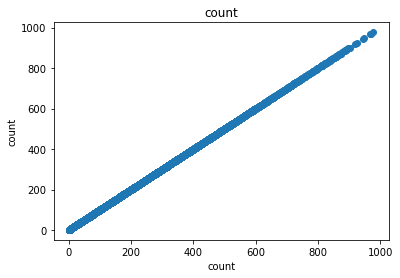

In [34]:
df1=df[continous_variable].drop('date',axis=1)
for feature in df1:
    data=df1.copy()
    plt.scatter(data[feature],data['count'])
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.title(feature)
    plt.show()

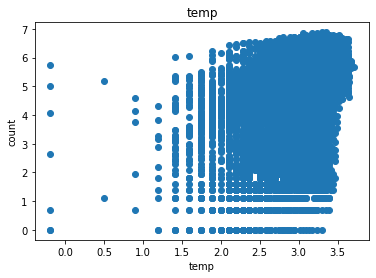

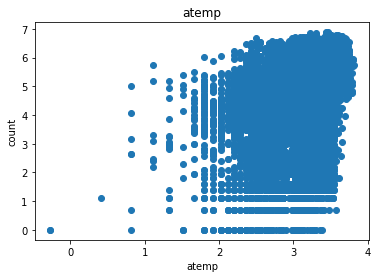

C:\Users\sys\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


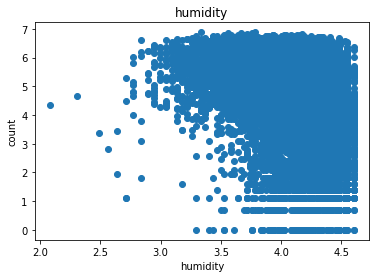

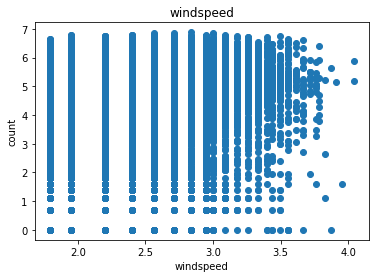

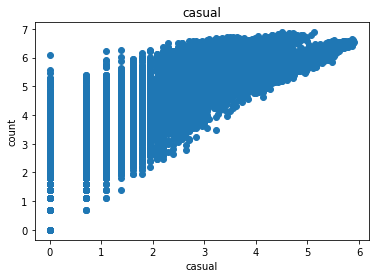

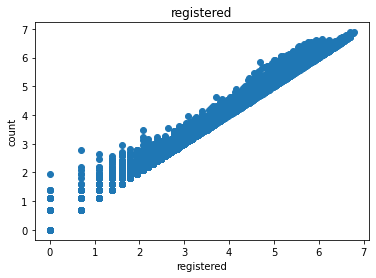

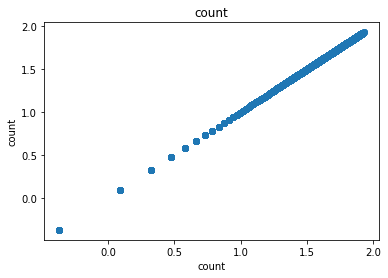

In [18]:
#transforming  into normal distribution
for feature in df1:
    data=df1.copy()
    data[feature]=np.log(data[feature])
    data['count']=np.log(data['count'])
    plt.scatter(data[feature],data['count'])
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.title(feature)
    plt.show()

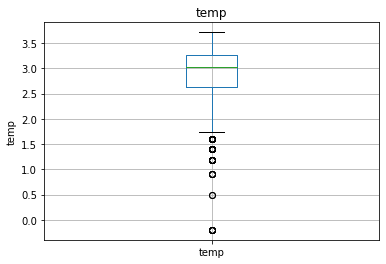

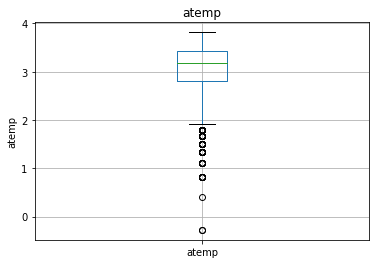

C:\Users\sys\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


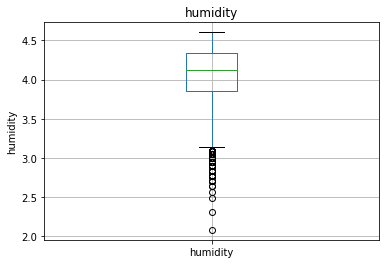

C:\Users\sys\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


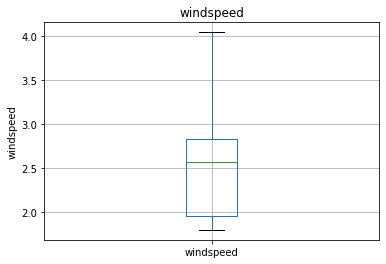

C:\Users\sys\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


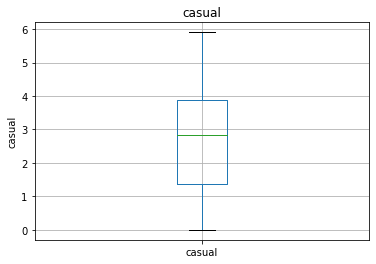

C:\Users\sys\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


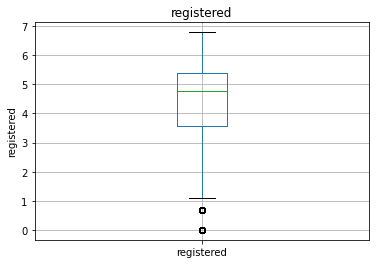

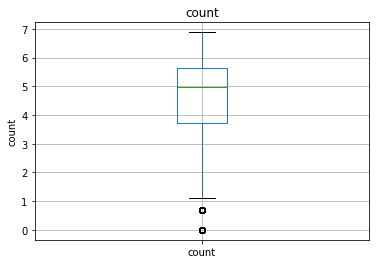

In [35]:
#outliers
for feature in df1:
    data=df1.copy()
    data[feature]=np.log(data[feature])
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()
    

In [36]:
bike.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,time
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,00:00:00
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,01:00:00
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,02:00:00
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,03:00:00
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,04:00:00


In [37]:
bike.drop(columns=['date','time'],axis=1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


<AxesSubplot:title={'center':'Rent bikes per hour in 2011 and 2012'}, xlabel='hour'>

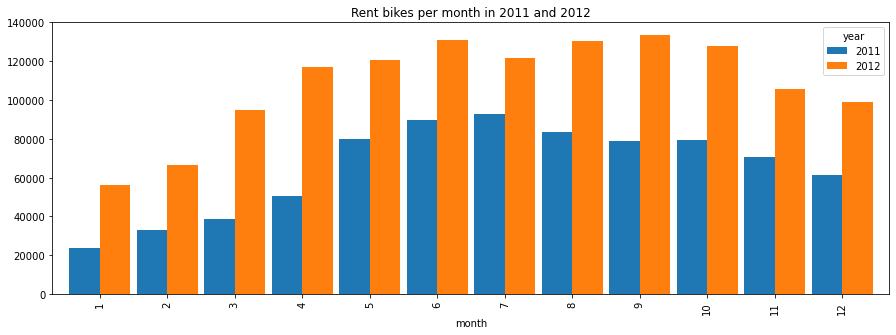

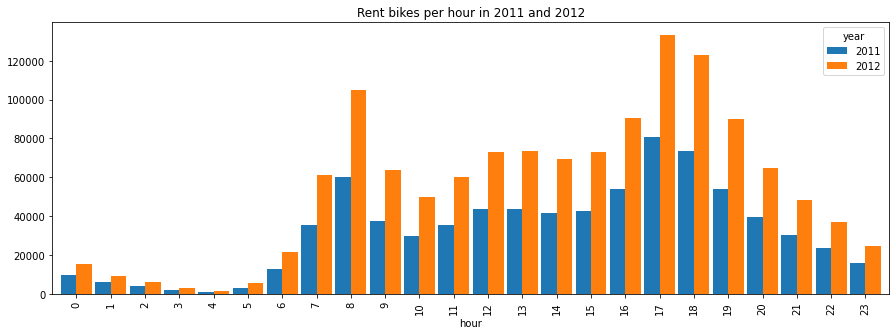

In [38]:
import datetime as dt

def plot_by_year(agg_attr, title):
    # extracting the required fields
    dd = bike.copy()
    dd['year'] = pd.to_datetime(bike['datetime']).dt.year # extratcing the year
    dd['hour'] = pd.to_datetime(bike['datetime']).dt.hour
    dd['month'] = pd.to_datetime(bike['datetime']).dt.month
        
    by_year = dd.groupby([agg_attr, 'year'])['count'].agg('sum').unstack() # groupby year
    return by_year.plot(kind='bar', figsize=(15,5), width=0.9, title=title) # returning the figure grouped by year


plot_by_year('month', "Rent bikes per month in 2011 and 2012") # plotting monthly bike rentals based on year
plot_by_year('hour', "Rent bikes per hour in 2011 and 2012") # plotting hourls bike rentals based  on year


In [ ]:
import datetime as dt

def plot_by_year(agg_attr, title):
    # extracting the required fields
    dd = bike.copy()
    dd['year'] = pd.to_datetime(bike['datetime']).dt.year # extratcing the year
    dd['hour'] = pd.to_datetime(bike['datetime']).dt.hour
    dd['month'] = pd.to_datetime(bike['datetime']).dt.month
        
    by_year = dd.groupby([agg_attr, 'year'])['count'].agg('sum').unstack() # groupby year
    return by_year.plot(kind='bar', figsize=(15,5), width=0.9, title=title) # returning the figure grouped by year


plot_by_year('month', "Rent bikes per month in 2011 and 2012") # plotting monthly bike rentals based on year
plot_by_year('hour', "Rent bikes per hour in 2011 and 2012") # plotting hourls bike rentals based  on year


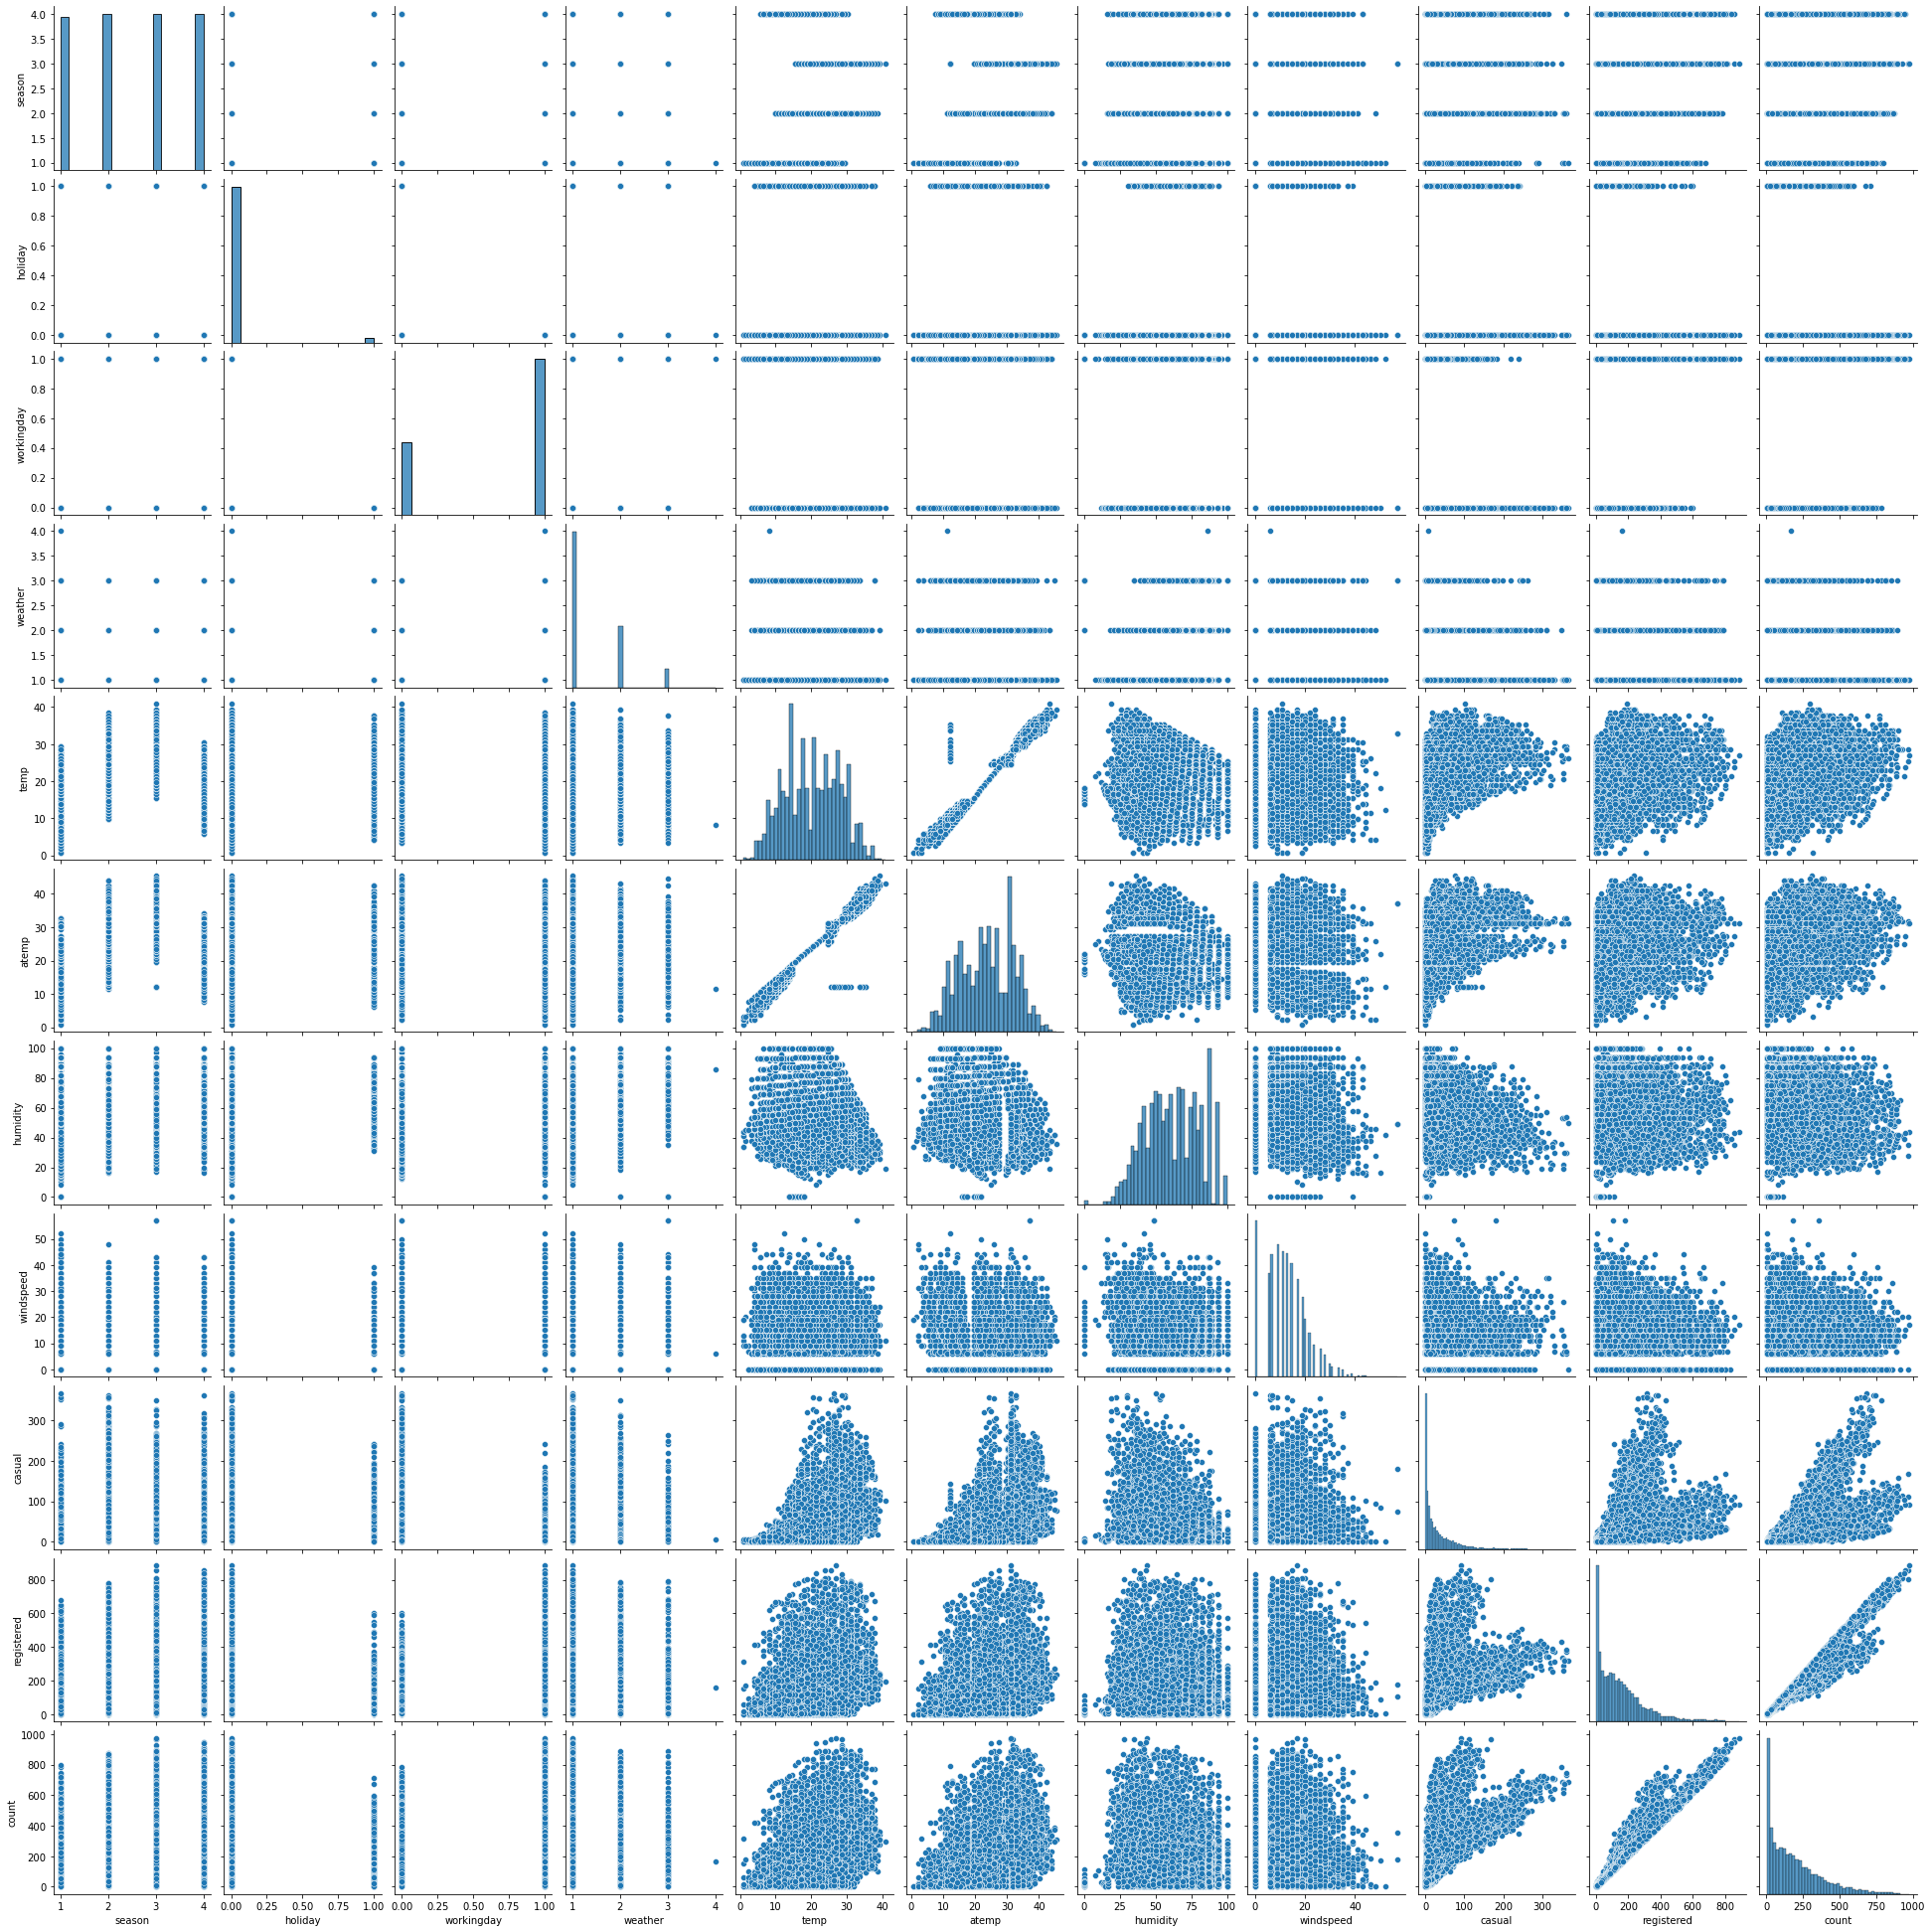

In [13]:
#plotting finding out the impact of each feature  on the count based on season
figure=sns.pairplot(data=df)


<AxesSubplot:xlabel='workingday', ylabel='count'>

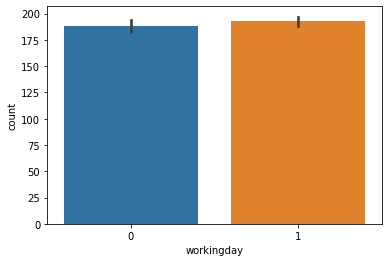

In [11]:
sns.barplot(x='workingday',y='count',data=df[['count','workingday']])

<AxesSubplot:xlabel='weather', ylabel='count'>

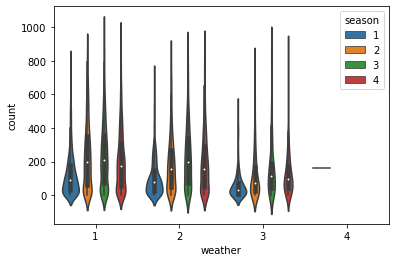

In [13]:
sns.violinplot(x='weather',y='count',hue='season',data=df[['weather','count','season']])

<AxesSubplot:>

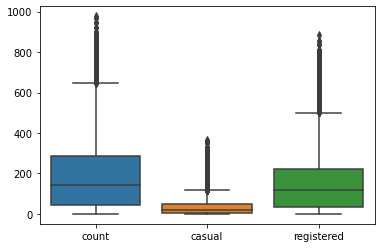

In [14]:
sns.boxplot(data=df[['count',
                          'casual',
                          'registered']])

In [15]:
corrMatt = df[['temp',
                    'atemp', 
                    'humidity', 
                    'windspeed', 
                    'casual', 
                    'registered', 
                    'count']].corr()

<AxesSubplot:>

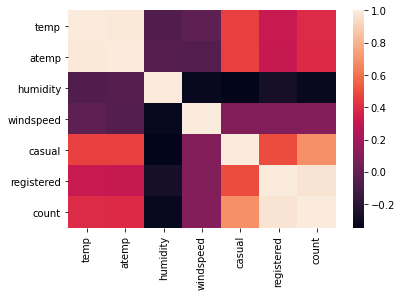

In [16]:
sns.heatmap(corrMatt)

<AxesSubplot:>

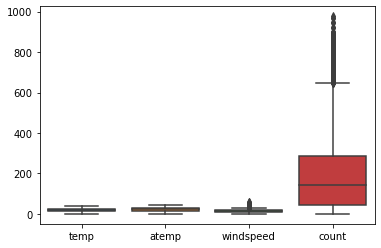

In [17]:
sns.boxplot(data=df[['temp',
                          'atemp',
                          'windspeed','count']])

In [18]:
#ordering the datasets
df=df[["season","holiday","workingday","weather","temp","atemp","humidity","windspeed","casual","registered","date","time","count"]]

In [55]:
df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,date,time,count
0,1,0,0,1,9.84,14.395,81,0.0000,3,13,2011-01-01,00:00:00,16
1,1,0,0,1,9.02,13.635,80,0.0000,8,32,2011-01-01,01:00:00,40
2,1,0,0,1,9.02,13.635,80,0.0000,5,27,2011-01-01,02:00:00,32
3,1,0,0,1,9.84,14.395,75,0.0000,3,10,2011-01-01,03:00:00,13
4,1,0,0,1,9.84,14.395,75,0.0000,0,1,2011-01-01,04:00:00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,7,329,2012-12-19,19:00:00,336
10882,4,0,1,1,14.76,17.425,57,15.0013,10,231,2012-12-19,20:00:00,241
10883,4,0,1,1,13.94,15.910,61,15.0013,4,164,2012-12-19,21:00:00,168
10884,4,0,1,1,13.94,17.425,61,6.0032,12,117,2012-12-19,22:00:00,129


In [56]:
df1=df.drop(columns=['date','time'],axis=1)

In [57]:
df1

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [58]:
x=df1.iloc[:,0:10]

In [60]:
x

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered
0,1,0,0,1,9.84,14.395,81,0.0000,3,13
1,1,0,0,1,9.02,13.635,80,0.0000,8,32
2,1,0,0,1,9.02,13.635,80,0.0000,5,27
3,1,0,0,1,9.84,14.395,75,0.0000,3,10
4,1,0,0,1,9.84,14.395,75,0.0000,0,1
...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,7,329
10882,4,0,1,1,14.76,17.425,57,15.0013,10,231
10883,4,0,1,1,13.94,15.910,61,15.0013,4,164
10884,4,0,1,1,13.94,17.425,61,6.0032,12,117


In [61]:
y=df1.iloc[:,10]

In [62]:
y

0         16
1         40
2         32
3         13
4          1
        ... 
10881    336
10882    241
10883    168
10884    129
10885     88
Name: count, Length: 10886, dtype: int64

In [63]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x, y)

ExtraTreesRegressor()

In [64]:
print(selection.feature_importances_)


[3.58638019e-04 5.53528407e-05 7.48637986e-03 5.69624645e-05
 3.64133719e-03 3.08475708e-03 8.62570637e-04 7.66155130e-05
 1.28578820e-01 8.55798567e-01]


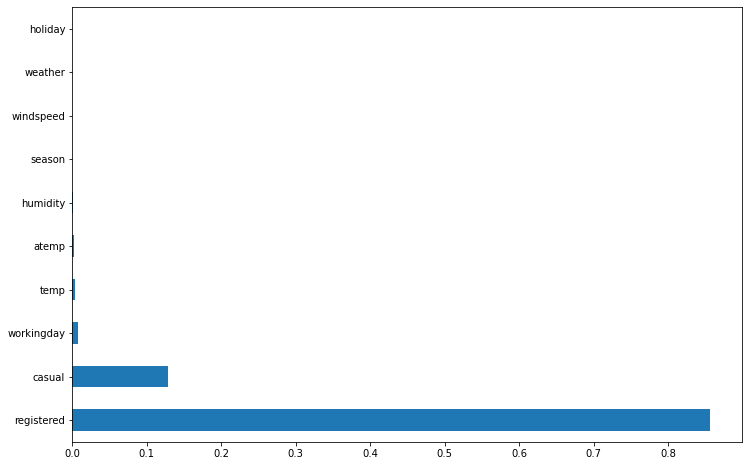

In [66]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)


In [27]:
y_train

2639    208
282       3
4220    166
8414    152
873      47
       ... 
9921    884
4922      5
8315    276
2641    178
1882    440
Name: count, Length: 7620, dtype: int64

In [28]:
from sklearn.linear_model import LinearRegression 

In [29]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [30]:
y_pred=lr.predict(x_test)

1.2511955138015804e-13
3.8467919329850365e-26
3.5372242137042716e-07
1.0
1.0


C:\Users\sys\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sys\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


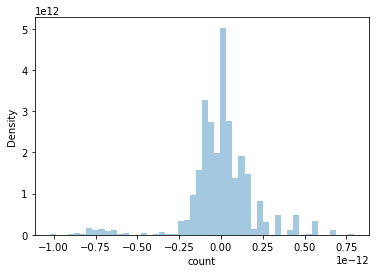

In [40]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test,y_pred))
print(metrics.mean_squared_error(y_test,y_pred))
print(np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))
print(lr.score(x_train,y_train))
print(lr.score(x_test,y_test))
sns.distplot(y_test-y_pred)
plt.show()



In [46]:
x_test

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered
7404,2,0,1,2,22.14,25.760,45,15.0013,37,210
4897,4,0,1,2,17.22,21.210,77,22.0028,0,3
8769,3,0,1,2,31.16,35.605,62,11.0014,103,711
2091,2,0,0,2,20.50,24.240,88,8.9981,18,64
7807,2,0,1,1,24.60,31.060,43,12.9980,91,382
...,...,...,...,...,...,...,...,...,...,...
7008,2,0,1,1,15.58,19.695,62,8.9981,22,670
8236,3,1,0,1,36.90,40.910,35,0.0000,177,322
726,1,0,0,2,16.40,20.455,30,19.9995,40,122
3258,3,0,1,1,32.80,37.120,49,16.9979,76,254


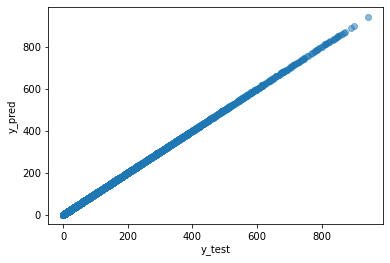

In [41]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [43]:
y_test

7404    247
4897      3
8769    814
2091     82
7807    473
       ... 
7008    692
8236    499
726     162
3258    330
1729     56
Name: count, Length: 3266, dtype: int64

In [74]:
y_pred

array([247.,   3., 814., ..., 162., 330.,  56.])

In [70]:
y[8769]

814

In [44]:
y_train

2639    208
282       3
4220    166
8414    152
873      47
       ... 
9921    884
4922      5
8315    276
2641    178
1882    440
Name: count, Length: 7620, dtype: int64

In [42]:
metrics.r2_score(y_test,y_pred)

1.0

In [36]:
from sklearn.linear_model import LogisticRegression




In [37]:
log=LogisticRegression()
log.fit(x_train,y_train)

C:\Users\sys\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

0.06443569553805774
0.037048377219840785


C:\Users\sys\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sys\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


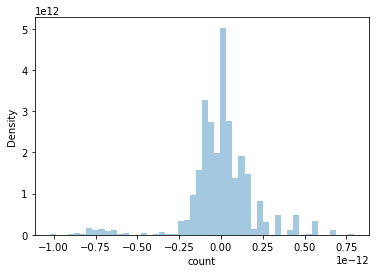

In [45]:
print(log.score(x_train,y_train))
print(log.score(x_test,y_test))
sns.distplot(y_test-y_pred)
plt.show()